## Machine Learning Analysis using Coffee Sales and Weather Data

In [102]:
import pandas as pd
from sqlalchemy import create_engine


In [103]:
import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [104]:
load_dotenv()

DB_NAME = os.getenv("MYSQL_DATABASE")
DB_USER = os.getenv("MYSQL_USER")
DB_PASSWORD = os.getenv("MYSQL_PASSWORD")
DB_HOST = "127.0.0.1"
DB_PORT = 3306

In [105]:
engine = create_engine(
    f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)


Read coffee sales data from MySQL running inside Docker

In [106]:
coffe_data = pd.read_sql(
    sql="SELECT * FROM coffee_sales",
    con=engine
)

In [107]:
coffe_data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday


 Read daily_weather data from MySQL running inside Docker

In [108]:
weather_data= pd.read_sql(
    sql="SELECT * FROM daily_weather",
    con=engine
)

In [109]:
weather_data.head()

,date,temperature_2m_mean
0,2023-01-01,8.78542
1,2023-01-02,7.98125
2,2023-01-03,9.69167
3,2023-01-04,13.08130
4,2023-01-05,9.91250


In [110]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 181 non-null    object 
 1   temperature_2m_mean  181 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


In [111]:
coffe_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype          
---  ------            --------------   -----          
 0   transaction_id    149116 non-null  object         
 1   transaction_date  149116 non-null  datetime64[ns] 
 2   transaction_time  149116 non-null  timedelta64[ns]
 3   transaction_qty   149116 non-null  int64          
 4   store_id          149116 non-null  object         
 5   store_location    149116 non-null  object         
 6   product_id        149116 non-null  object         
 7   unit_price        149116 non-null  float64        
 8   product_category  149116 non-null  object         
 9   product_type      149116 non-null  object         
 10  product_detail    149116 non-null  object         
 11  total_sales       149116 non-null  float64        
 12  month             149116 non-null  object         
 13  hour              149116 non-null  int64    

In [112]:
coffe_data.rename(columns={'transaction_date':'date'},inplace=True)
coffe_data.head()

,transaction_id,date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday


In [113]:
weather_data['date'] = pd.to_datetime(weather_data['date'])
coffe_data['date']=pd.to_datetime(coffe_data['date'])

 Merge datasets to create a unified dataset for machine learning analysis


In [114]:
data_ml=pd.merge(coffe_data,weather_data,on='date',how='left')

In [115]:
data_ml.head()

,transaction_id,date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,total_sales,month,hour,weekday,temperature_2m_mean
0,1,2023-01-01,0 days 07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg,6.0,2023-01,7,Sunday,8.78542
1,2,2023-01-01,0 days 07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday,8.78542
2,3,2023-01-01,0 days 07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg,9.0,2023-01,7,Sunday,8.78542
3,4,2023-01-01,0 days 07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm,2.0,2023-01,7,Sunday,8.78542
4,5,2023-01-01,0 days 07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg,6.2,2023-01,7,Sunday,8.78542


In [117]:
model_df =data_ml[[
    'month',
    'temperature_2m_mean',
    'weekday',
    'total_sales'
]]


In [122]:
model_df.head()

,month,temperature_2m_mean,weekday,total_sales
0,2023-01,8.78542,7,6.0
1,2023-01,8.78542,7,6.2
2,2023-01,8.78542,7,9.0
3,2023-01,8.78542,7,2.0
4,2023-01,8.78542,7,6.2


In [119]:
model_df['weekday'] = model_df['weekday'].map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})


/tmp/ipykernel_3495/1940638475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['weekday'] = model_df['weekday'].map({


In [126]:
model_df['month'] = pd.to_datetime(model_df['month'])
model_df['month'] = model_df['month'].dt.month

/tmp/ipykernel_3495/1685521822.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['month'] = pd.to_datetime(model_df['month'])
/tmp/ipykernel_3495/1685521822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['month'] = model_df['month'].dt.month


In [129]:
model_df.head()

,month,temperature_2m_mean,weekday,total_sales
0,1,8.78542,7,6.0
1,1,8.78542,7,6.2
2,1,8.78542,7,9.0
3,1,8.78542,7,2.0
4,1,8.78542,7,6.2


In [133]:
model_df['month'] = model_df['month'].astype(int)
model_df['weekday'] = model_df['weekday'].astype(int)


/tmp/ipykernel_3495/1216522145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['month'] = model_df['month'].astype(int)
/tmp/ipykernel_3495/1216522145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['weekday'] = model_df['weekday'].astype(int)


In [135]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                149116 non-null  int64  
 1   temperature_2m_mean  149116 non-null  float64
 2   weekday              149116 non-null  int64  
 3   total_sales          149116 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 4.6 MB


In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'sklearn'

<Figure size 1200x400 with 0 Axes>

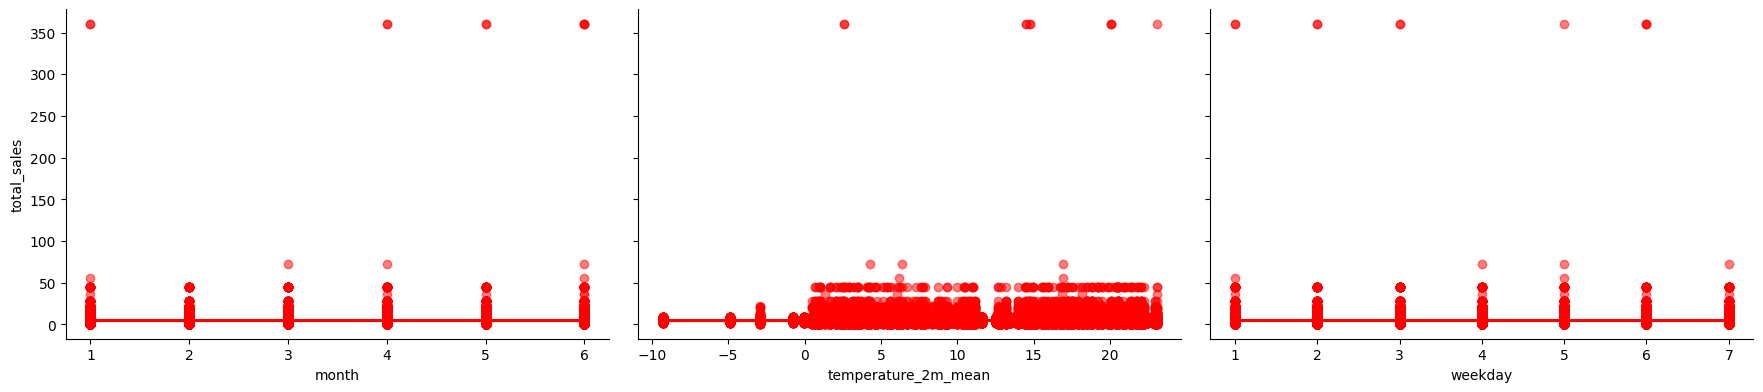

In [136]:
# Adjusting the figure size correctly for the seaborn pairplot
plt.figure(figsize=(12, 4))
g = sns.PairGrid(model_df, x_vars=['month', 'temperature_2m_mean', 'weekday'], y_vars="total_sales", height=4, aspect=1.5)
g = g.map(sns.regplot, color='red', scatter_kws={'alpha': 0.5})
plt.show()

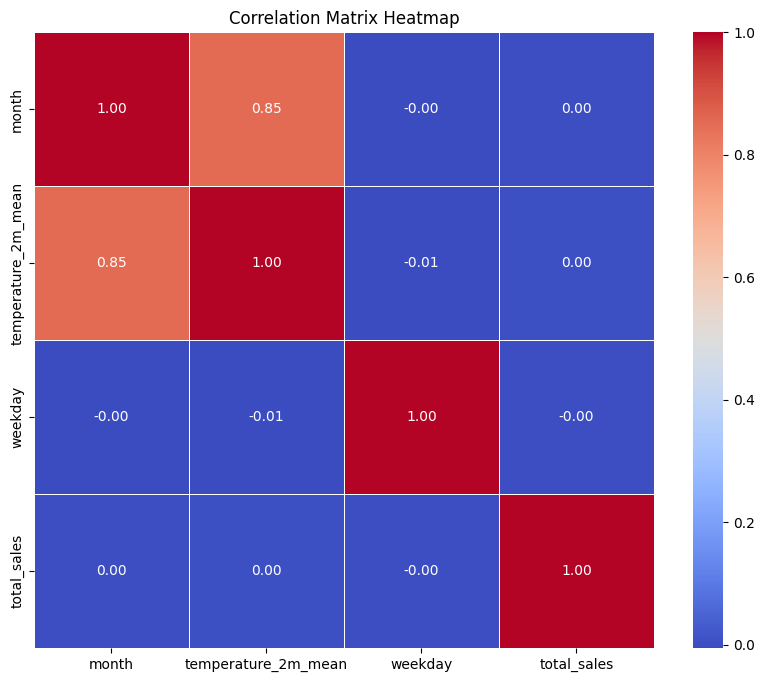

In [137]:
correlation_matrix = model_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [140]:
X = data_ml.drop('total_sales', axis=1)
y = data_ml[["total_sales"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=99)

NameError: name 'train_test_split' is not defined